### portfoliostocks is a database made by a web crawl of Yahoo finance 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [2]:
conn = sqlite3.connect("portfoliostocks.db")
c = conn.cursor()

In [3]:
query =("SELECT name FROM sqlite_master WHERE type = 'table'")
print(c.execute(query).fetchall())

[('stocks_prices',)]


In [4]:
stocks = pd.read_sql("Select * from stocks_prices", conn)
stocks.head()

,stock_name,price,time1
0,Nasdaq,"7,809.14",2019-04-01 13:17:42
1,Crude,61.45,2019-04-01 13:17:42
2,Dow,"26,185.51",2019-04-01 13:17:42
3,Gold,"1,289.50",2019-04-01 13:17:41
4,S&P,"2,860.56",2019-04-01 13:17:42


In [5]:
stocks["price"]= stocks["price"].astype(str).str.replace(r'\,', "").astype(float)
stocks["time1"]= stocks["time1"].str.replace(r'[\d{4}]+-[\d{2}]+-[01]' ,"")


In [6]:
stocks["time1"]= stocks["time1"].str.replace("^1 " ,"")

In [7]:
grouped = stocks.groupby("stock_name")
stock_highs = np.max(grouped["price"])
stock_lows = np.min(grouped["price"])

In [8]:
crude1 = stocks[stocks["stock_name"]=="Crude"]
gold1 = stocks[stocks["stock_name"] == "Gold"]
sNp1 = stocks[stocks["stock_name"]=="S&P"]
nasdaq1 = stocks[stocks["stock_name"] == "Nasdaq"]
dow1 = stocks[stocks["stock_name"]=="Dow"]

In [9]:
stock_stats = grouped["price"].agg([np.mean, np.std])


In [10]:
def autolabel(rects, ax, xpos="center"):
    xpos = xpos.lower()
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.text(rect.get_x()+(rect.get_width()/2), height, '{}'.format(height), ha = xpos, va='bottom')

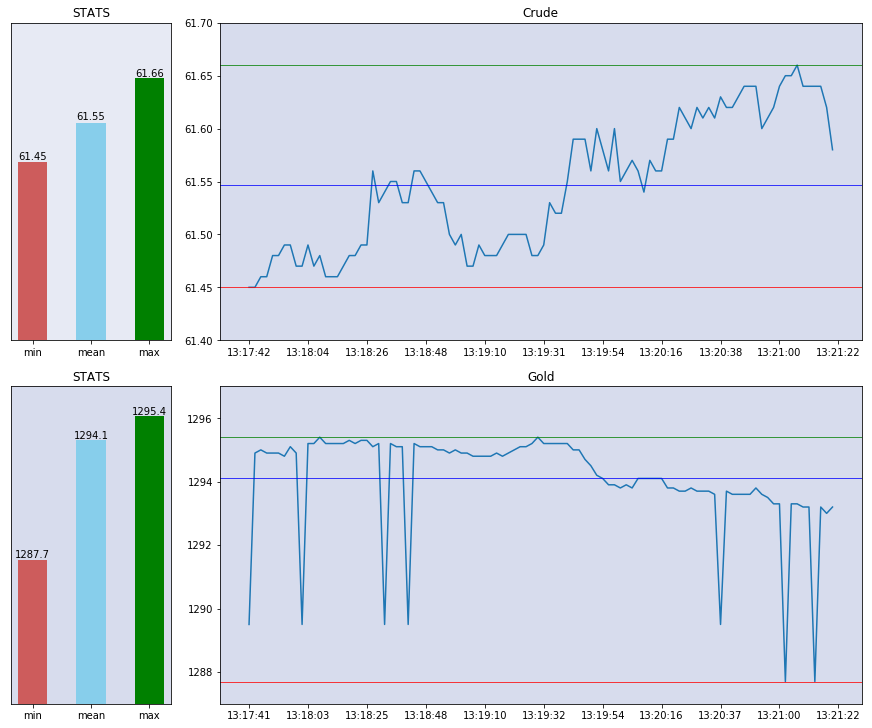

In [11]:
# side plot of mean and std with a time plot
#import matplotlib.gridspec as gridspec
crude =[ stock_lows["Crude"], stock_stats.loc["Crude"]["mean"],stock_highs["Crude"]]
gold = [stock_lows["Gold"],stock_stats.loc["Gold"]["mean"],stock_highs["Gold"]]
index = np.arange(len(crude))
width = .5

fig = plt.figure(constrained_layout = True,figsize = (12,10))
grid_spec = fig.add_gridspec(ncols=5, nrows=2)
#Warning the the method above needs column first but below 
#the slicing is row, col
ax1 = fig.add_subplot(grid_spec[0, :1])
ax1.set_title("STATS")
rects1 = ax1.bar(index, crude, width, color= ["IndianRed","SkyBlue","Green"])
ax1.set_ylim([61,61.8])
ax1.set_yticks([])
ax1.set_xticks(index)
ax1.set_xticklabels(("min", "mean", "max"))
ax1.set_facecolor("#C1C8E461")
index1 = np.arange(0,len(crude1), 1)


ax2 = fig.add_subplot(grid_spec[0,1:])
ax2.set_title("Crude")
ax2.plot(index1, crude1["price"])
ax2.set_ylim([61.4, 61.7])
ax2.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax2.set_xticklabels(crude1["time1"])
ax2.axhline(crude[0], 0,100, color = "Red", linewidth= .75)
ax2.axhline(crude[1], 0,100, color = "Blue", linewidth= .75)
ax2.axhline(crude[2], 0,100, color = "Green", linewidth= .75)
ax2.set_facecolor("#C1C8E4A1")

ax3 =fig.add_subplot(grid_spec[1, :1])
ax3.set_title("STATS")
rects2 = ax3.bar(index, gold, width, color= ["IndianRed","SkyBlue","Green"])
ax3.set_xticks(index)
ax3.set_ylim([1280, 1297])
ax3.set_xticklabels(("min", "mean", "max"))
ax3.set_yticks([])
ax3.set_facecolor("#C1C8E4A1")

ax4 = fig.add_subplot(grid_spec[1,1:])
ax4.set_title("Gold")
ax4.plot(index1, gold1["price"])
ax4.set_ylim([1287, 1297])
ax4.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax4.set_xticklabels(gold1["time1"])
ax4.axhline(gold[0], 0,100, color = "Red", linewidth= .75)
ax4.axhline(gold[1], 0,100, color = "Blue", linewidth= .75)
ax4.axhline(gold[2], 0,100, color = "Green", linewidth= .75)
ax4.set_facecolor("#C1C8E4A1")

autolabel(rects1 , ax1)

autolabel(rects2 , ax3)



### Histogram of Prices

In [47]:

sNp_price =sNp1["price"].values 
dow_price =dow1['price'].values 
nasdaq_price =nasdaq1['price'].values 
crude_price =crude1['price'].values
gold_price =gold1['price'].values


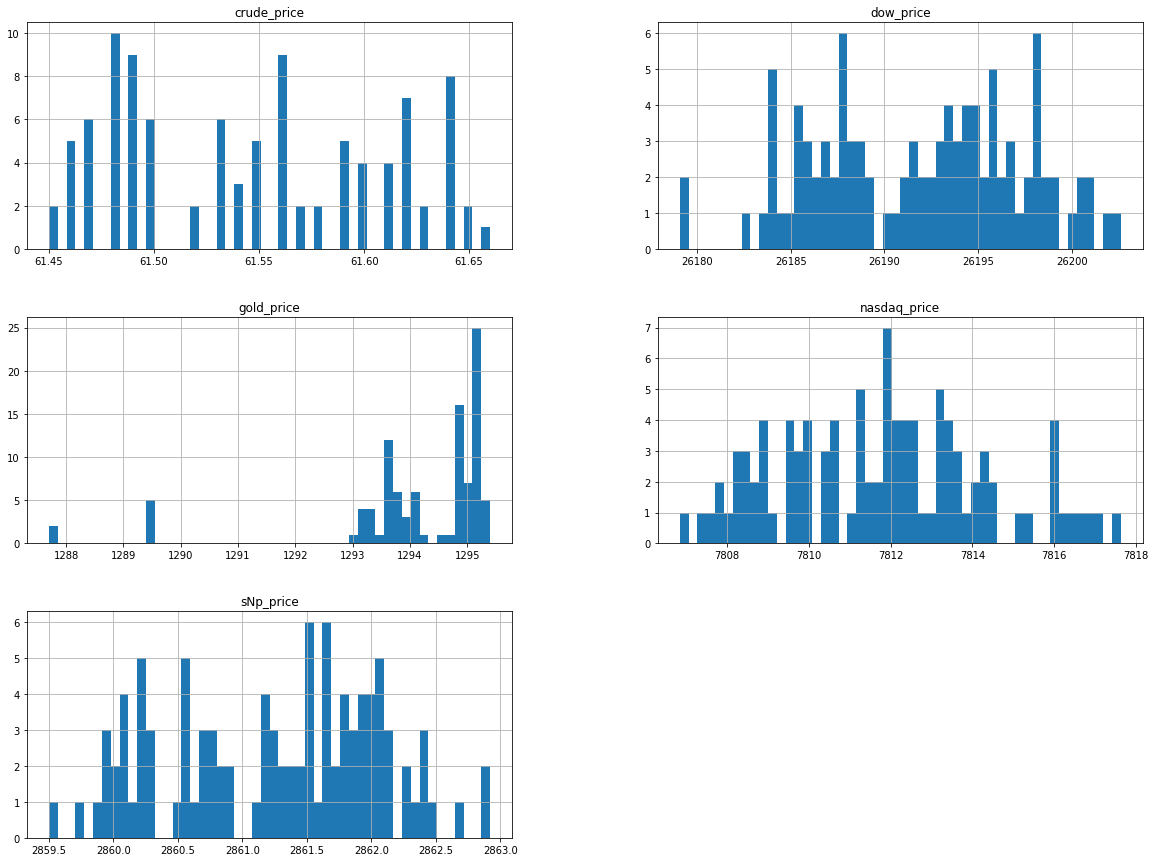

In [46]:
prices = {"sNp_price": list(sNp_price), "dow_price":list(dow_price), "nasdaq_price":list(nasdaq_price), 
                       "crude_price":list(crude_price), "gold_price":list(gold_price)}
prices_df = pd.DataFrame(data = prices)
%matplotlib inline
import matplotlib.pyplot as plt
prices_df.hist(bins =50, figsize=(20,15))
plt.show()



### Basic Pie Chart

#### largest gain during the time frame

In [48]:
sNp_gain = np.max(sNp1['price']) - np.min(sNp1["price"])
dow_gain = np.max(dow1['price']) - np.min(dow1["price"])
nasdaq_gain = np.max(nasdaq1['price']) - np.min(nasdaq1["price"])
crude_gain = np.max(crude1['price']) - np.min(crude1["price"])
gold_gain = np.max(gold1['price']) - np.min(gold1["price"])
        
        

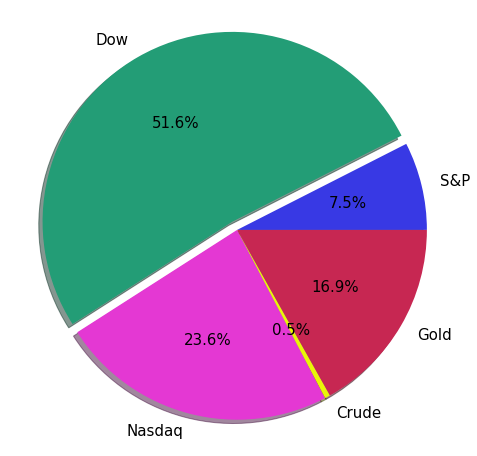

In [49]:
labels = "S&P", "Dow", "Nasdaq","Crude", "Gold"
gains = [sNp_gain, dow_gain, nasdaq_gain, crude_gain, gold_gain]
explodes = gains.index(max(gains))
colors = ["#3839E4","#239D76","#E438D3","#EAF508","#C72752"]
explode = np.zeros(len(gains))
explode[explodes]=.05
fig1, ax1 = plt.subplots(figsize = (8,8))
wedges, labels, autopcts =ax1.pie(gains, explode = explode,colors = colors, labels = labels, shadow = True,
                                  autopct='%1.1f%%', startangle = 0)
ax1.axis('equal')
for label in labels:
    label.set_fontsize(15)
for autopct in autopcts:
    autopct.set_fontsize(15)

plt.show()

### Plotting with two different scales

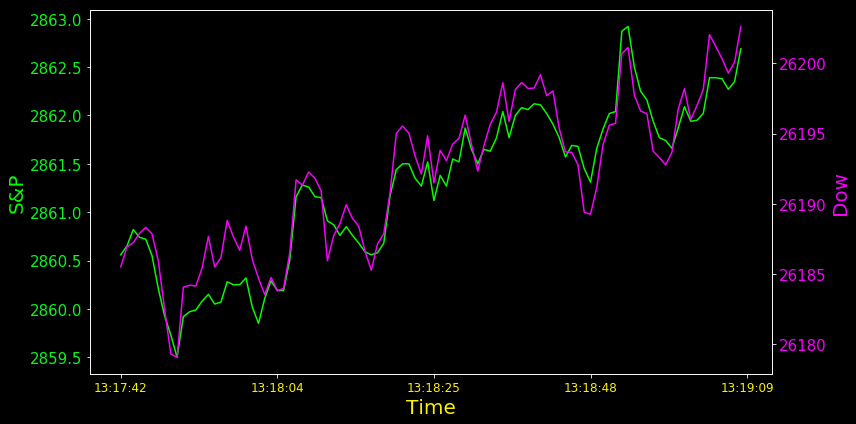

In [14]:
import numpy as np
import matplotlib.pyplot as plt

y_sNp = np.round(np.linspace(stock_lows["S&P"], stock_highs["S&P"], 11),2)
y_dow = np.round(np.linspace(stock_lows["Dow"], stock_highs["Dow"], 11),2)

plt.style.use("dark_background")
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.set_xlabel("Time", color ="#F8F104", fontsize = 20)

ax1.set_ylabel("S&P", color = "#0BF804",fontsize = 20)
ax1.set_xticks([0,25,50,75,100])
ax1.set_xticklabels(sNp1["time1"], color ="#F8F104", fontsize = 12)
ax1.plot(index1, sNp1['price'], color = "#0BF804")
ax1.tick_params(axis='y', labelcolor = "#08F51E", labelsize = 15)

ax2 = ax1.twinx()
ax2.set_ylabel("Dow", color = "#F104F8", fontsize = 20)
ax2.plot(index1, dow1['price'], color = "#F104F8")
ax2.tick_params(axis='y', labelcolor = "#F104F8", labelsize = 15)

fig.tight_layout()
plt.show()



In [62]:
import os 
import tarfile
from six.moves import urllib

In [63]:
DOWNLOAD_ROOT= "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz= tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [64]:
import pandas as pd

def load_housing_data(housing_path= HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [65]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Visualizing Geograhical Data

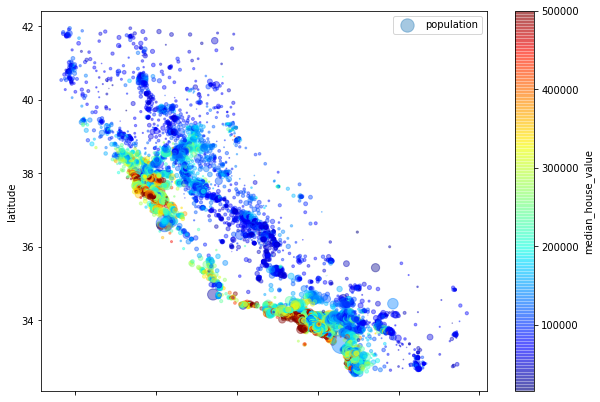

In [66]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = .4,
            s = housing["population"]/100, label = "population", figsize = (10,7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

## Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x219D4E70>,
      dtype=object)

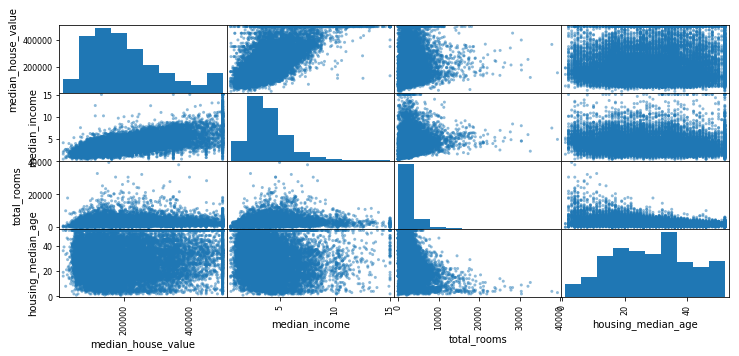

In [69]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize = (12,5))